In [8]:
using Plots
gadfly()
default(leg=false,size=(400,400));
#debugplots();

[Plots.jl] Switched to backend: gadfly


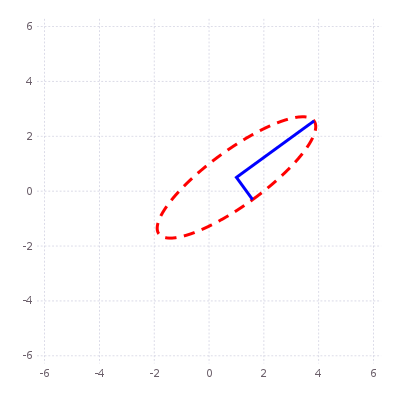

In [47]:
l = 6
plot(EllipseRecipe(1, 3.5, 1, 0.5, 0.3π), xlim=(-l,l),ylim=(-l,l))

In [119]:
n = 100
x = randn(n) * 2 + 1
y = randn(n) * 1 + x + 4
scatter(x, y, c=:orange, m=4);

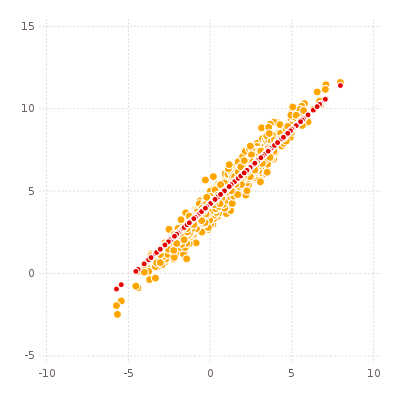

In [91]:
using OnlineStats
matx = reshape(x,n,1)
reg = SGModel(matx, y)
yhat = predict(reg, matx)
scatter!(x,yhat,m=3)

In [120]:
using OnlineStats, MultivariateStats
c = CovarianceMatrix([x y])
p = pca(c)
w,h = 1.96 * sqrt(principalvars(p))
projection(p)

2x2 Array{Float64,2}:
 0.707107  -0.707107
 0.707107   0.707107

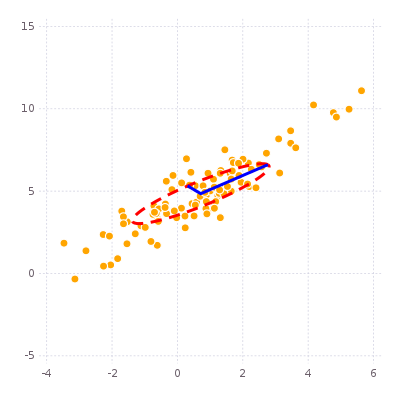

In [121]:

mx, my, c = mean(x), mean(y), cor(x,y)
U, S, V = svd([x y-my])
#w, h = sqrt(S)
#w, h = 1.96 * std([x y] * V, 1)
ep = EllipseRecipe(w, h, mx, my, 2π - 0.25π*c)
plot!(ep)

In [99]:
U,S,V = svd([x y])
std([x y] * V,1)

1x2 Array{Float64,2}:
 2.66054  1.29587

In [ ]:
y = linspace(0,1,100)
p = subplot(repmat(y,1,4),n=4)
subplot!(ylabel=["y1","y1","y2","y2"], xlabel=["x1","x2","x1","x2"])

In [ ]:
function addOrReplace(v::AbstractVector, t::DataType, args...; kw...)
    for (i,vi) in enumerate(v)
        if isa(guide, t)
            gplt.guides[i] = t(args...; kw...)
        end
    end
end


# findGuideAndSet(gplt, t::DataType, s::@compat(AbstractString))
for (i,(r,c)) in enumerate(p.layout)
    gplt = p.plts[i].o
    if r < Plots.nrows(p.layout)
        push!(gplt.guides, Gadfly.Guide.xticks(label=false))
        Plots.findGuideAndSet(gplt, Gadfly.Guide.xlabel, "")
    end
    if c > 1
        #push!(gplt.guides, Gadfly.Guide.yticks(label=false))
        Plots.findGuideAndSet(gplt, Gadfly.Guide.yticks, label=false)
        Plots.findGuideAndSet(gplt, Gadfly.Guide.ylabel, "")
    end
end
#p1 = p.plts[1].o
#push!(p1.guides, Gadfly.Guide.xticks(label=false,ticks=nothing))
p

In [ ]:
# link the subplots together to share axes... useful for facet plots, cross-scatters, etc
function linkXAxis(subplt::Plots.Subplot{Plots.GadflyPackage, Plots.GridLayout})
end

In [ ]:
p = subplot(repmat(y,1,4),layout=[1,1,2])

In [ ]:
fl = FlexLayout(5, [2,1,2])
gl = GridLayout(3,2)

In [ ]:
for (r,c) in gl
    @show r,c
end
length(gl)